In [1]:
import numpy as np
import pandas as pd
import loadData
import monteCarloClass
import time

In [2]:
data, dataName = loadData.loadData("mt_all.csv")

intensityVariable = "deltaDurS"
sensoryVar = "audNoise"
standardVar = "standardDur"
conflictVar = "conflictDur"
#s
visualStandardVar = "unbiasedVisualStandardDur"
visualTestVar = "unbiasedVisualTestDur"
audioStandardVar = "standardDur"
audioTestVar = "testDurS"


 Total trials before cleaning
: 2156
uniqueSensory: [1.2 0.1] 
 uniqueStandard: [0.5] 
 uniqueConflict: [np.float64(-0.25), np.float64(-0.17), np.float64(-0.08), np.float64(0.0), np.float64(0.08), np.float64(0.17), np.float64(0.25)]

0  trials with testDurSCheck False
0  trials with standardDurCheck False

0  trials with abs(testDurSCompare) > 0.05
0  trials with abs(standardDurCompare) > 0.05

0  trials with testDurSCheckBias False
0  trials with negative visual test duration
0  trials with negative visual standard duration
testdurCompare > 0.05: 0 trials
0  trials with negative visual standard duration
0  trials with negative visual test duration
total trials after cleaning: 2156


In [3]:
data

,Unnamed: 0,standardDur,audNoise,order,preDur,postDur,isiDur,trial_num,totalDur,delta_dur_percents,...,standardDurCheck,testDurSCompare,standardDurCompare,standard_dur,riseDur,logStandardDur,logConflictDur,logTestDur,logDeltaDur,logDeltaDurMs
0,0,0.5,1.2,2,0.26781,0.30966,0.70300,0,2.73668,0.90,...,True,0.00057,0.0033,0.5,1,-0.693147,-1.386294,-0.047018,0.646129,0.641858
1,1,0.5,1.2,1,0.24270,0.36824,0.54399,1,1.68218,-0.95,...,True,0.00339,0.0031,0.5,1,-0.693147,-inf,-3.684489,-2.991342,-2.995613
2,2,0.5,1.2,1,0.30129,0.42682,0.77832,2,2.03368,-0.95,...,True,0.00319,0.0067,0.5,1,-0.693147,NaN,-3.684489,-2.991342,-2.995613
3,3,0.5,1.2,1,0.36824,0.41845,0.51051,3,2.75341,0.90,...,True,0.00077,0.0039,0.5,1,-0.693147,-1.386294,-0.047018,0.646129,0.641858
4,4,0.5,1.2,2,0.28455,0.30966,0.82017,4,1.94163,-0.95,...,True,0.00329,0.0038,0.5,1,-0.693147,-inf,-3.684489,-2.991342,-2.995613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,611,0.5,0.1,1,0.38383,0.42555,0.55071,611,2.20285,-0.31,...,True,0.00011,0.0000,0.5,1,-0.693147,NaN,-1.072623,-0.379476,-0.380775
2152,612,0.5,1.2,1,0.40886,0.25032,0.85945,612,2.38642,-0.27,...,True,0.00236,0.0067,0.5,1,-0.693147,-2.525729,-1.002012,-0.308865,-0.310164
2153,613,0.5,1.2,2,0.24198,0.25867,0.51734,613,2.10273,0.17,...,True,0.00261,0.0027,0.5,1,-0.693147,NaN,-0.537700,0.155447,0.154148
2154,614,0.5,0.1,2,0.36714,0.44224,0.76766,614,2.44483,-0.27,...,True,0.00036,0.0029,0.5,1,-0.693147,-2.525729,-1.002012,-0.308865,-0.310164


In [4]:
# Instantiate the Monte Carlo class
mc_fitter = monteCarloClass.OmerMonteCarlo(data)

In [5]:
mc_fitter.nSimul = 1000
mc_fitter.optimizationMethod= "bads"  # Use BADS for optimization
mc_fitter.nStart = 1 # Number of random starts for optimization
mc_fitter.modelName = "lognorm"  # Set measurement distribution to Gaussian


In [6]:
timeStart = time.time()
print(f"\nFitting Causal Inference Model for {dataName} with {len(mc_fitter.groupedData)} unique conditions")
fittedParams = mc_fitter.fitCausalInferenceMonteCarlo(mc_fitter.groupedData)
print(f"\nFitted parameters for {dataName}: {fittedParams}")
print(f"Time taken to fit: {time.time() - timeStart:.2f} seconds")
mc_fitter.modelFit= fittedParams
mc_fitter.logLikelihood= -mc_fitter.nLLMonteCarloCausal(fittedParams, mc_fitter.groupedData)


Fitting Causal Inference Model for mt_all with 358 unique conditions

Starting 1 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 1/1 [02:32<00:00, 152.36s/it]


✅ Best result from 1 attem           spts:
  → Final parameters: [0.10822627 0.17598823 0.32519361 0.68327395 0.61957054 0.62726182]
  → Final log-likelihood: 1101.855232

Fitted parameters for mt_all: [0.10822627 0.17598823 0.32519361 0.68327395 0.61957054 0.62726182]
Time taken to fit: 152.39 seconds


In [7]:
import os
import numpy as np
import json
def saveFitResultsSingle(fittedParams, dataName,modelType="lognormal"):
    participantID = dataName.split('_')[0]
    save_dir = os.path.join("model_fits", participantID)

    filename = f"{participantID}_{modelType}_fit.json"
    filepath = os.path.join(save_dir, filename)

    # make directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # calculate AIC and BIC
    k=len(fittedParams) # number of parameters
    n=len(mc_fitter.groupedData) # number of data points
    mc_fitter.logLikelihood= -mc_fitter.nLLMonteCarloCausal(fittedParams, mc_fitter.groupedData)
    aic= 2*k - 2*mc_fitter.logLikelihood
    bic= np.log(n)*k - 2*mc_fitter.logLikelihood

    # store results in a dictionary
    results_dict = {
        "participantID": participantID,
        "modelType": modelType,
        "fittedParams": fittedParams.tolist() if isinstance(fittedParams, np.ndarray) else fittedParams,
        "AIC": float(aic),
        "BIC": float(bic),
        "logLikelihood": mc_fitter.logLikelihood,
        "n_conditions": n
    }


    # Save JSON
    with open(filepath, 'w') as f:
        json.dump(results_dict, f, indent=4)
        
    print(f"✅ Saved fit for {participantID} ({modelType}) to: {filepath}")


saveFitResultsSingle(fittedParams, dataName, modelType="lognormal")

✅ Saved fit for mt (lognormal) to: model_fits/mt/mt_lognormal_fit.json


In [8]:
# read back the saved file to verify
participantID = dataName.split('_')[0]
loaded_filepath = os.path.join("model_fits", participantID, f"{participantID}_lognormal_fit.json")
with open(loaded_filepath, 'r') as f:
    loaded_results = json.load(f)
print("\nLoaded results from saved file:")
print(loaded_results)


Loaded results from saved file:
{'participantID': 'mt', 'modelType': 'lognormal', 'fittedParams': [0.10822626963257792, 0.17598822824656962, 0.3251936081796884, 0.6832739547118545, 0.6195705443620683, 0.3251936081796884], 'AIC': 2215.8557765318333, 'BIC': 2239.1389744502376, 'logLikelihood': -1101.9278882659166, 'n_conditions': 358}


In [9]:
mc_fitter.simulatedData = mc_fitter.simulateMonteCarloData(fittedParams, mc_fitter.data, nSamples=100)
mc_fitter.simDataFit=mc_fitter.fitMultipleStartingPoints(mc_fitter.simulatedData,1)

"psychometric fit"
mc_fitter.dataFit= mc_fitter.fitMultipleStartingPoints(data,1)

Noise: 0.1, Conflict: -0.25, Lambda: 0.108, Sigma_a: 0.176, Sigma_v: 0.325, p_c: 0.683
Noise: 0.1, Conflict: -0.17, Lambda: 0.108, Sigma_a: 0.176, Sigma_v: 0.325, p_c: 0.683
Noise: 0.1, Conflict: -0.08, Lambda: 0.108, Sigma_a: 0.176, Sigma_v: 0.325, p_c: 0.683
Noise: 0.1, Conflict: 0.0, Lambda: 0.108, Sigma_a: 0.176, Sigma_v: 0.325, p_c: 0.683
Noise: 0.1, Conflict: 0.08, Lambda: 0.108, Sigma_a: 0.176, Sigma_v: 0.325, p_c: 0.683
Noise: 0.1, Conflict: 0.17, Lambda: 0.108, Sigma_a: 0.176, Sigma_v: 0.325, p_c: 0.683
Noise: 0.1, Conflict: 0.25, Lambda: 0.108, Sigma_a: 0.176, Sigma_v: 0.325, p_c: 0.683
Noise: 1.2, Conflict: -0.25, Lambda: 0.108, Sigma_a: 0.620, Sigma_v: 0.325, p_c: 0.683
Noise: 1.2, Conflict: -0.17, Lambda: 0.108, Sigma_a: 0.620, Sigma_v: 0.325, p_c: 0.683
Noise: 1.2, Conflict: -0.08, Lambda: 0.108, Sigma_a: 0.620, Sigma_v: 0.325, p_c: 0.683
Noise: 1.2, Conflict: 0.0, Lambda: 0.108, Sigma_a: 0.620, Sigma_v: 0.325, p_c: 0.683
Noise: 1.2, Conflict: 0.08, Lambda: 0.108, Sigma_a

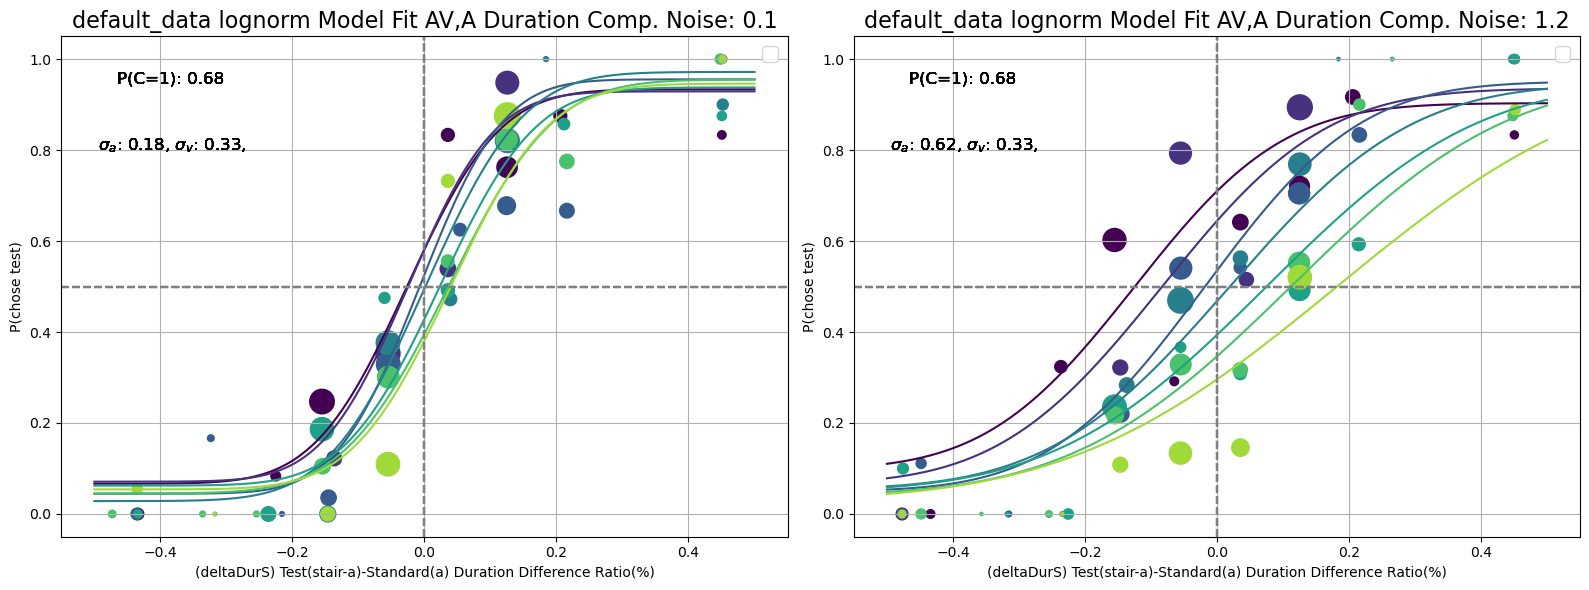

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
# mc_fitter.dataName = dataName
# mc_fitter.data= data
# mc_fitter.visualStandardVar = visualStandardVar
# mc_fitter.visualTestVar = visualTestVar
# mc_fitter.audioTestVar = audioTestVar

mc_fitter.plotPsychometrics_MC_Data()

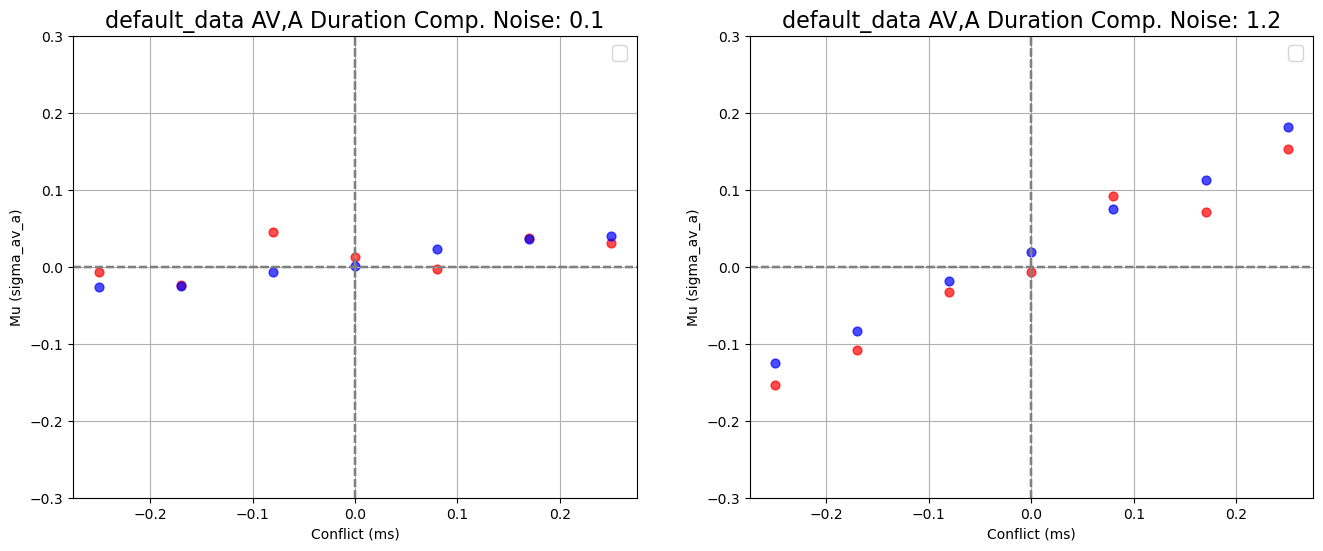

In [11]:

mc_fitter.plot_mu_vs_conflict_MC_vs_Data()

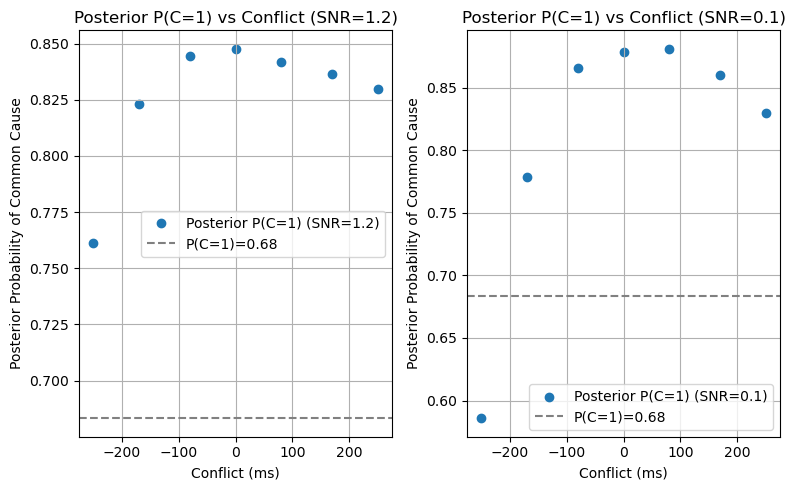

In [12]:
mc_fitter.plot_posterior_vs_conflict(mc_fitter.data, fittedParams)

# N simulations values to try

In [13]:
nSimul_values = [100,500,1000,2000]
results = []
mc_fitter.modelName = "lognorm"  # Set measurement distribution to lognormal

mc_fitter.nStart = 1  # Number of random starts for optimization
mc_fitter.optimizationMethod = "bads"  # Use BADS for optimization
for nSimul in nSimul_values:
    mc_fitter.nSimul = nSimul
    fittedParams = mc_fitter.fitCausalInferenceMonteCarlo(mc_fitter.groupedData)
    log_likelihood = -mc_fitter.nLLMonteCarloCausal(fittedParams, mc_fitter.groupedData)
    results.append((nSimul, fittedParams, log_likelihood))

# Compare results
for nSimul, params, ll in results:
    print(f"nSimul: {nSimul}, Log-Likelihood: {ll:.4f}, Params: {params}")


Starting 1 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 1/1 [01:00<00:00, 60.31s/it]



✅ Best result from 1 attem           spts:
  → Final parameters: [0.08455043 0.18888911 0.38260054 0.77513128 0.65312042 0.84464909]
  → Final log-likelihood: 1109.385071

Starting 1 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 1/1 [03:09<00:00, 189.60s/it]



✅ Best result from 1 attem           spts:
  → Final parameters: [0.08574227 0.17688578 0.32248015 0.66730549 0.61037203 0.39991723]
  → Final log-likelihood: 1102.565706

Starting 1 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 1/1 [02:16<00:00, 136.53s/it]



✅ Best result from 1 attem           spts:
  → Final parameters: [0.11247476 0.15794125 0.37422299 0.90416324 0.57257555 0.17445605]
  → Final log-likelihood: 1102.191270

Starting 1 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 1/1 [02:43<00:00, 163.71s/it]



✅ Best result from 1 attem           spts:
  → Final parameters: [0.09234673 0.18218864 0.30433277 0.62965843 0.63702087 0.90483276]
  → Final log-likelihood: 1100.788533
nSimul: 100, Log-Likelihood: -1100.9896, Params: [0.08455043 0.18888911 0.38260054 0.77513128 0.65312042 0.38260054]
nSimul: 500, Log-Likelihood: -1102.6287, Params: [0.08574227 0.17688578 0.32248015 0.66730549 0.61037203 0.32248015]
nSimul: 1000, Log-Likelihood: -1102.3993, Params: [0.11247476 0.15794125 0.37422299 0.90416324 0.57257555 0.37422299]
nSimul: 2000, Log-Likelihood: -1100.6552, Params: [0.09234673 0.18218864 0.30433277 0.62965843 0.63702087 0.30433277]


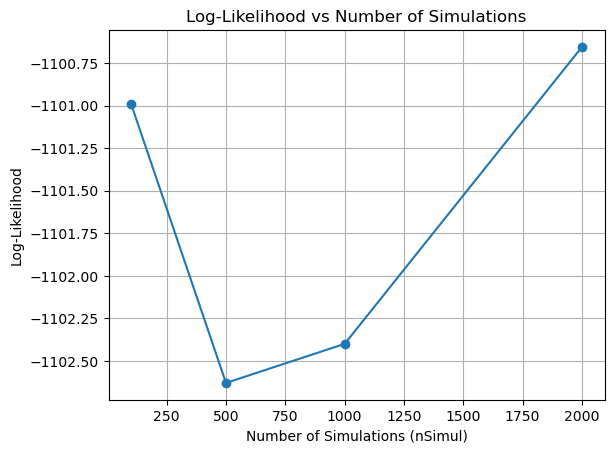

In [14]:
#plot the log likelihood vs nSimul
plt.figure()
plt.plot([r[0] for r in results], [r[2] for r in results], marker='o')
plt.xlabel('Number of Simulations (nSimul)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Number of Simulations')
plt.grid()
plt.show()

# Number of Starting Points for Optimization


Starting 5 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 5/5 [12:11<00:00, 146.31s/it]



✅ Best result from 5 attem           spts:
  → Final parameters: [0.10320723 0.17564123 0.3250911  0.7254525  0.62483721 0.9079989 ]
  → Final log-likelihood: 1101.019894

Starting 10 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 10/10 [24:57<00:00, 149.77s/it]



✅ Best result from 10 attem           spts:
  → Final parameters: [0.10485344 0.16941056 0.33724999 0.69104131 0.62525287 0.34045607]
  → Final log-likelihood: 1100.977519

Starting 20 optimization attempts using 'bads'...
Model is lognorm


Optimization Attempts: 100%|██████████| 20/20 [52:02<00:00, 156.12s/it]



✅ Best result from 20 attem           spts:
  → Final parameters: [0.12167148 0.16567054 0.28650231 0.67152327 0.61569133 1.05225452]
  → Final log-likelihood: 1101.051956


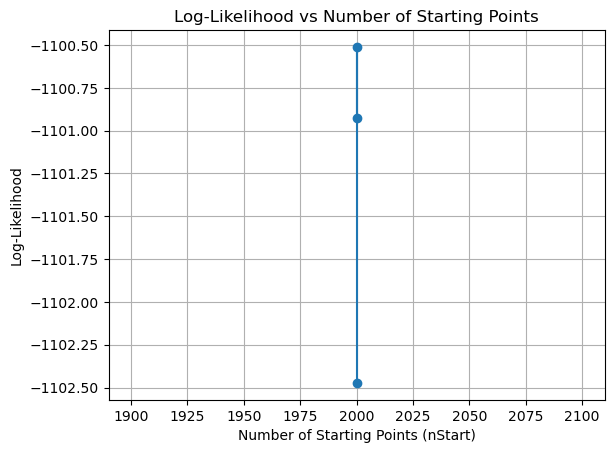

In [15]:
nStartValues = [5,10,20]
results = []
mc_fitter.modelName = "lognorm"  # Set measurement distribution to lognormal

mc_fitter.nSimul = 1000
mc_fitter.optimizationMethod = "bads"  # Use BADS for optimization
for nStart in nStartValues:
    mc_fitter.nStart = nStart
    fittedParams = mc_fitter.fitCausalInferenceMonteCarlo(mc_fitter.groupedData)
    log_likelihood = -mc_fitter.nLLMonteCarloCausal(fittedParams, mc_fitter.groupedData)
    results.append((nSimul, fittedParams, log_likelihood))
    

# # Compare results
# for nSimul, params, ll in results:
#     print(f"nSimul: {nSimul}, Log-Likelihood: {ll:.4f}, Params: {params}")
#plot the log likelihood vs nStart
plt.figure()
plt.plot([r[0] for r in results], [r[2] for r in results], marker='o')
plt.xlabel('Number of Starting Points (nStart)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Number of Starting Points')
plt.grid()
plt.show()